In [24]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')

!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

import pickle
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import numpy as np
print('hello')
data = pd.read_csv("student-mat.csv", sep=";")

hello


In [3]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [37]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]] #selecting relevant data

predict = "G3"

X = np.array(data.drop([predict], 1)) #labels
y = np.array(data[predict]) #features

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1) #making 4 variables , using 10% sata to test, 90% to train

#implementing algorithm

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train) 
acc = linear.score(x_test, y_test) #checking accuracy of model
print(acc)


0.8394599296515617


In [38]:
print('coefficient : \n',linear.coef_)
print('intercept : \n',linear.intercept_)


coefficient : 
 [ 0.15217193  0.97560624 -0.12147055 -0.23814257  0.03704356]
intercept : 
 -1.5647579279374586


In [39]:
predictions=linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions,x_test[x],y_test[x])
    

[ 8.65395378 10.24613357  7.05787617 14.92610023 18.7185671  -0.5793916
 15.03088874 12.77085415 11.61685285  8.64265069  9.00956923  3.97936608
  3.74522118  8.86491207  5.930098   10.86350799  8.25153533 12.85341719
 10.14134507  8.28383844 -0.8639661   9.61825693  8.04958404 12.01798986
 -0.46885307 10.67194798  7.74512924  6.38155303  7.51087485  7.33599689
 12.96289473  4.131538    3.62375063 16.1650091   9.481116   10.7193314
 14.26485949 11.9211967   2.80511485  9.75055001] [ 7 10  3  1  0] 10
[ 8.65395378 10.24613357  7.05787617 14.92610023 18.7185671  -0.5793916
 15.03088874 12.77085415 11.61685285  8.64265069  9.00956923  3.97936608
  3.74522118  8.86491207  5.930098   10.86350799  8.25153533 12.85341719
 10.14134507  8.28383844 -0.8639661   9.61825693  8.04958404 12.01798986
 -0.46885307 10.67194798  7.74512924  6.38155303  7.51087485  7.33599689
 12.96289473  4.131538    3.62375063 16.1650091   9.481116   10.7193314
 14.26485949 11.9211967   2.80511485  9.75055001] [ 9 11  

In [14]:
with open('studentgrades.pickle','wb') as f:
    pickle.dump(linear,f)

pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

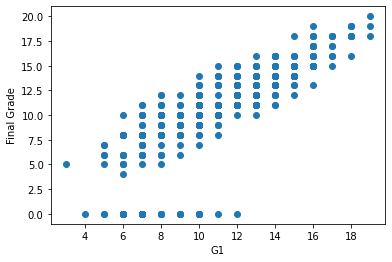

In [49]:

plot = "G1"
plt.scatter(data[plot], data["G3"]) 

plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()